In [1]:
import numpy as np

In [2]:
import pandas as pd

In [6]:
import seaborn as sns

In [5]:
import matplotlib.pyplot as plt

In [ ]:
#TASK 1 :
url =("https://raw.githubusercontent.com/panchaldhruv27223/datasets_for_ml_-csv-xlsl-/refs/heads/main/kc_house_data.csv")
df = pd.read_csv(url)

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [11]:
df.shape

(21613, 21)

In [12]:
print("Missing values before injection:")
print(df[["sqft_lot", "bathrooms"]].isna().sum())

Missing values before injection:
sqft_lot     0
bathrooms    0
dtype: int64


In [13]:
rng = np.random.default_rng(42)  # reproducible
n = len(df)

for col in ['sqft_lot', 'bathrooms']:
    idx = rng.choice(df.index, size=int(0.05 * n), replace=False)
    df.loc[idx, col] = np.nan

In [14]:
print(df[["sqft_lot", "bathrooms"]].isna().sum())

sqft_lot     1080
bathrooms    1080
dtype: int64


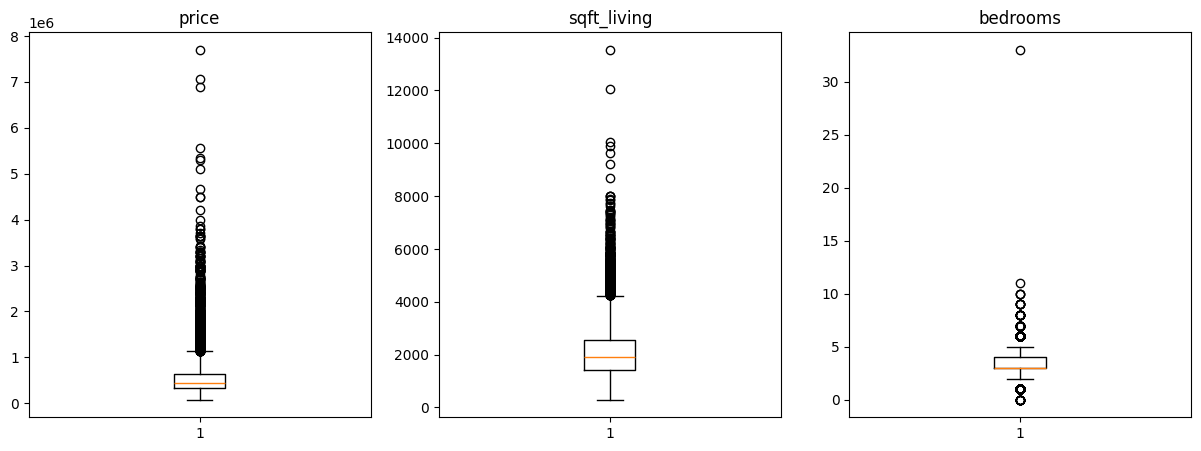

In [15]:
cols = ['price','sqft_living','bedrooms']
fig, axes = plt.subplots(1,3, figsize=(15,5))
for ax, c in zip(axes, cols):
    ax.boxplot(df[c].dropna())
    ax.set_title(c)
plt.show()

In [16]:
def iqr_filter(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    return df[(df[col] >= lower) & (df[col] <= upper)]


In [17]:
for c in ['price','sqft_living','bedrooms']:
    df = iqr_filter(df, c)

In [18]:
df.shape

(19687, 21)

In [19]:
df['date'] = pd.to_datetime(df['date'])
df['sale_year'] = df['date'].dt.year
df['sale_month'] = df['date'].dt.month
df['house_age'] = df['sale_year'] - df['yr_built']

In [21]:
df['was_renovated'] = (df['yr_renovated'] != 0).astype(int)
df['age_since_renovation'] = df.apply(
    lambda r: r['house_age'] if r['yr_renovated']==0 else r['sale_year'] - r['yr_renovated'],
    axis=1
)

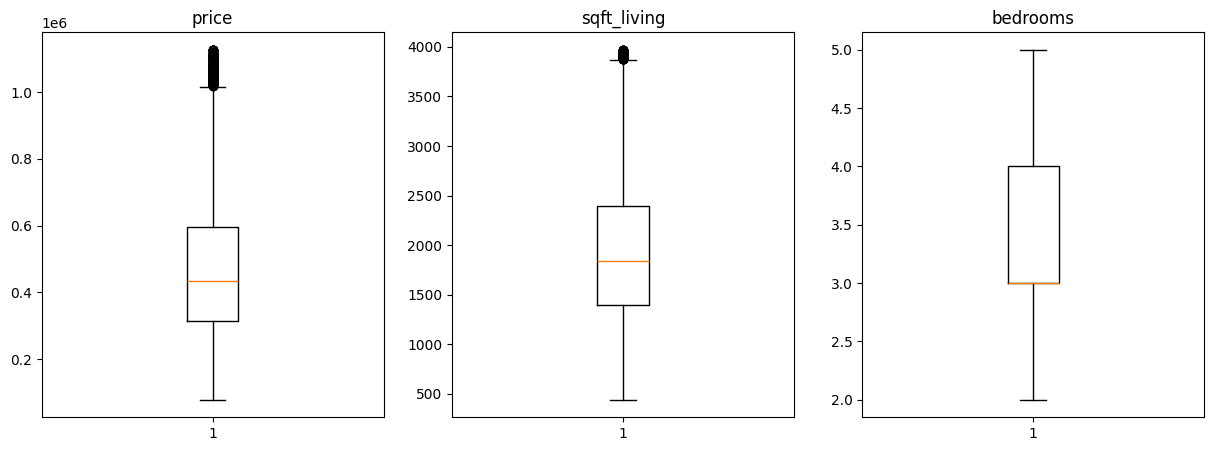

In [22]:
cols = ['price','sqft_living','bedrooms']
fig, axes = plt.subplots(1,3, figsize=(15,5))
for ax, c in zip(axes, cols):
    ax.boxplot(df[c].dropna())
    ax.set_title(c)
plt.show()

In [23]:
df['floors_safe'] = df['floors'].replace(0, 1)
df['sqft_living_per_floor'] = df['sqft_living'] / df['floors_safe']

In [25]:
df['bath_per_bed'] = df.apply(
    lambda r: r['bathrooms'] / r['bedrooms'] if r['bedrooms'] > 0 else r['bathrooms'],
    axis=1)

In [26]:
df.drop(columns=['floors_safe'], inplace=True)

In [27]:
new_features = [
    'sale_year',
    'sale_month',
    'house_age',
    'was_renovated',
    'age_since_renovation',
    'sqft_living_per_floor',
    'bath_per_bed'
]

print("Newly engineered features:")
print(df[new_features].head(10))  


Newly engineered features:
    sale_year  sale_month  house_age  was_renovated  age_since_renovation  \
0        2014          10         59              0                    59   
1        2014          12         63              1                    23   
2        2015           2         82              0                    82   
3        2014          12         49              0                    49   
4        2015           2         28              0                    28   
6        2014           6         19              0                    19   
7        2015           1         52              0                    52   
8        2015           4         55              0                    55   
9        2015           3         12              0                    12   
10       2015           4         50              0                    50   

    sqft_living_per_floor  bath_per_bed  
0                  1180.0      0.333333  
1                  1285.0      0.750000  

In [ ]:
#TASK 2 :

In [28]:
numeric_features = [
    'sqft_living', 'sqft_lot', 'bathrooms', 'bedrooms',
    'house_age', 'age_since_renovation',
    'sqft_living_per_floor', 'bath_per_bed'
]

In [29]:
categorical_features = ['zipcode']  

passthrough_features = ['grade', 'condition', 'was_renovated']

In [32]:
pip install sklearn

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [37]:
pip install scikit-learn ipykernel

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
import sklearn

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [46]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [51]:
cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

In [52]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", cat_pipeline, categorical_features),
        ("pass", "passthrough", passthrough_features)
    ]
)

In [ ]:
X_transformed = preprocessor.fit_transform(df)

In [55]:
print(X_transformed.shape)

(19687, 81)


In [56]:
print(df.shape)

(19687, 28)


In [ ]:
# TASK 3: Model training & hyperparameter tuning

In [57]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.pipeline import Pipeline

In [59]:
!pip install xgboost

   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/56.8 MB ? eta -:--:--
   ---------------------------------------- 0.3/56.8 MB ? eta -:--:--
    --------------------------------------- 0.8/56.8 MB 1.9 MB/s eta 0:00:31
   - -------------------------------------- 1.6/56.8 MB 2.4 MB/s eta 0:00:24
   - -------------------------------------- 2.4/56.8 MB 2.8 MB/s eta 0:00:20
   -- ------------------------------------- 3.1/56.8 MB 2.9 MB/s eta 0:00:19
   -- ------------------------------------- 4.2/56.8 MB 3.3 MB/s eta 0:00:16
   --- ------------------------------------ 5.5/56.8 MB 3.7 MB/s eta 0:00:14
   ---- ----------------------------------- 6.6/56.8 MB 3.9 MB/s eta 0:00:13
   ----- ---------------------------------- 7.9/56.8 MB 4.2 MB/s eta 0:00:12
   ------ --------------------------------- 8.9/56.8 MB 4.3 MB/s eta 0:00:12
   ------- -------------------------------- 10.2/56.8 MB 4.5 MB/s eta 0:00:11
   -------- -------


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [60]:
import xgboost as xgb
from xgboost import XGBRegressor

In [ ]:
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
])


gb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', GradientBoostingRegressor(random_state=42))
])


xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(random_state=42, n_jobs=-1, verbosity=0))
])

In [62]:
rf_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [None, 10, 20]
}

gb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

xgb_param_grid = {
    'regressor__n_estimators': [100, 200],
    'regressor__learning_rate': [0.05, 0.1],
    'regressor__max_depth': [3, 5]
}

In [63]:
from sklearn.model_selection import GridSearchCV

In [64]:
gs_rf = GridSearchCV(rf_pipeline, rf_param_grid, cv=3,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1, verbose=2)

# Gradient Boosting
gs_gb = GridSearchCV(gb_pipeline, gb_param_grid, cv=3,
                     scoring='neg_mean_squared_error',
                     n_jobs=-1, verbose=2)

# XGBoost
gs_xgb = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=3,
                      scoring='neg_mean_squared_error',
                      n_jobs=-1, verbose=2)

In [69]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['price', 'id', 'date'])  # adjust as needed
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [70]:
gs_rf.fit(X_train, y_train)
gs_gb.fit(X_train, y_train)
gs_xgb.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Fitting 3 folds for each of 8 candidates, totalling 24 fits


,estimator,"Pipeline(step...=None, ...))])"
,param_grid,"{'regressor__learning_rate': [0.05, 0.1], 'regressor__max_depth': [3, 5], 'regressor__n_estimators': [100, 200]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,transformers,"[('num', ...), ('cat', ...), ...]"


In [71]:
print("Random Forest Best Params:", gs_rf.best_params_)
print("Gradient Boosting Best Params:", gs_gb.best_params_)
print("XGBoost Best Params:", gs_xgb.best_params_)

print("Random Forest Best CV Score:", -gs_rf.best_score_**0.5)
print("Gradient Boosting Best CV Score:", -gs_gb.best_score_**0.5)
print("XGBoost Best CV Score:", -gs_xgb.best_score_**0.5)

Random Forest Best Params: {'regressor__max_depth': None, 'regressor__n_estimators': 200}
Gradient Boosting Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
XGBoost Best Params: {'regressor__learning_rate': 0.1, 'regressor__max_depth': 5, 'regressor__n_estimators': 200}
Random Forest Best CV Score: nan
Gradient Boosting Best CV Score: nan
XGBoost Best CV Score: nan


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6256\1998761349.py:5: RuntimeWarning: invalid value encountered in scalar power
  print("Random Forest Best CV Score:", -gs_rf.best_score_**0.5)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6256\1998761349.py:6: RuntimeWarning: invalid value encountered in scalar power
  print("Gradient Boosting Best CV Score:", -gs_gb.best_score_**0.5)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_6256\1998761349.py:7: RuntimeWarning: invalid value encountered in scalar power
  print("XGBoost Best CV Score:", -gs_xgb.best_score_**0.5)


In [ ]:
# TASK 4 : Evaluation and Interpretation

In [72]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

In [73]:
best_model = gs_rf.best_estimator_

y_pred = best_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [74]:
print(f"R²: {r2:.4f}")
print(f"MAE: {mae:,.2f}")
print(f"RMSE: {rmse:,.2f}")

R²: 0.7788
MAE: 67,499.03
RMSE: 96,167.19


In [75]:
rmse_orig = 80000  # replace with actual
improvement = (rmse_orig - rmse) / rmse_orig * 100

In [76]:
print(f"Baseline RMSE: {rmse_orig:.2f}")
print(f"Tuned RMSE: {rmse:.2f}")
print(f"Improvement: {improvement:.2f}%")

Baseline RMSE: 80000.00
Tuned RMSE: 96167.19
Improvement: -20.21%


In [77]:
import matplotlib.pyplot as plt

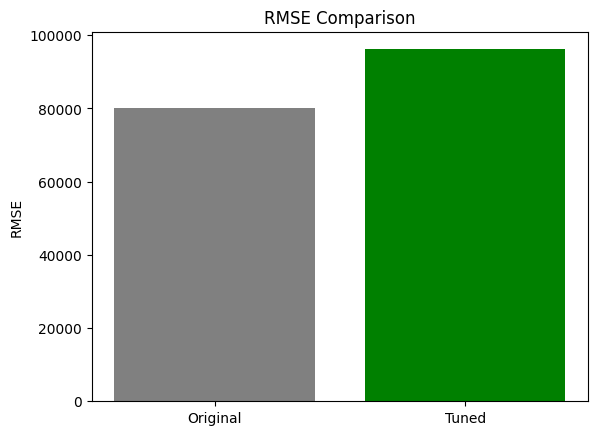

In [78]:
plt.bar(['Original', 'Tuned'], [rmse_orig, rmse], color=['gray','green'])
plt.ylabel("RMSE")
plt.title("RMSE Comparison")
plt.show()

In [79]:
reg = best_model.named_steps['regressor']
pre = best_model.named_steps['preprocessor']

# Get feature names
num_feats = numeric_features
ohe = pre.named_transformers_['cat'].named_steps['onehot']
cat_feats = ohe.get_feature_names_out(categorical_features)
pass_feats = passthrough_features

feature_names = list(num_feats) + list(cat_feats) + list(pass_feats)

# Importance values
importances = reg.feature_importances_

import pandas as pd
fi = pd.DataFrame({"feature": feature_names, "importance": importances})
fi = fi.sort_values("importance", ascending=False).head(10)

In [80]:
print(fi)

                  feature  importance
78                  grade    0.274061
0             sqft_living    0.209761
4               house_age    0.107640
1                sqft_lot    0.054007
6   sqft_living_per_floor    0.031762
5    age_since_renovation    0.022974
11          zipcode_98004    0.021890
21          zipcode_98023    0.016720
7            bath_per_bed    0.016528
29          zipcode_98033    0.014113


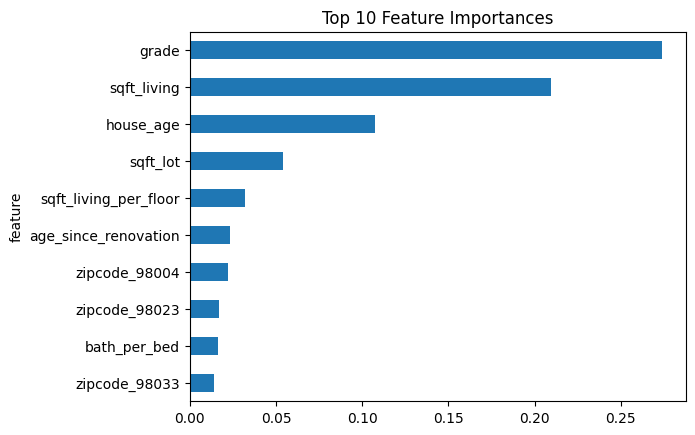

In [81]:
fi.plot.barh(x="feature", y="importance", legend=False)
plt.title("Top 10 Feature Importances")
plt.gca().invert_yaxis()
plt.show()

The top five most important features influencing house prices were grade, sqft_living, house_age, sqft_lot, and sqft_living_per_floor. These results are logical since buyers value house quality, living space, and property size. Age also matters, as newer homes are typically more desirable. Notably, the engineered feature sqft_living_per_floor ranked in the top five, showing that feature engineering added meaningful predictive power.